# numpy로 이미지 데이터 다루기

In [1]:
# !pip install matplotlib koreanize-matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 7.7 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.1 MB/s  0:00:01
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.0 MB 10.0 MB/s eta 0:00:01
   

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd

In [5]:
img = Image.open("./data/sample00.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr)) # img는 앞에가 행, 열이고 뒤에가 채널
print("배열 shape", img_arr.shape) 
print("배열 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape (163, 310, 3)
배열 데이터 타입:  uint8
배열 차원:  3


In [7]:
img_data = pd.DataFrame(img_arr[:,:,1])
img_data

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,169,169,169,169,174,174,174,174,175,177,...,107,102,96,93,77,73,70,67,65,65
1,169,169,169,169,174,174,174,174,175,177,...,105,99,94,90,77,73,70,67,65,65
2,169,169,169,169,174,174,174,174,175,177,...,101,96,91,87,77,74,71,68,66,66
3,169,169,169,170,174,174,174,174,175,177,...,98,92,87,82,77,74,71,68,66,66
4,169,169,169,171,174,174,173,175,176,178,...,99,93,88,84,82,75,72,70,67,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,34,34,34,34,36,36,36,36,36,36,...,106,106,106,106,105,105,105,105,105,105
159,34,34,34,34,36,36,36,36,36,36,...,106,106,106,106,105,105,105,105,105,105
160,37,37,37,37,36,36,36,36,37,37,...,101,101,101,101,101,101,102,102,102,102
161,37,37,37,37,36,36,36,36,37,37,...,99,99,99,99,99,99,100,100,100,100


In [8]:
img_data.to_csv("./data/img_data_00.csv", index=False, encoding="utf-8-sig")

# 이미지 조작하기

In [9]:
img = Image.open("./data/sample1.jpg")
img_arr = np.array(img)
print("배열 타입: ", type(img_arr))
print("배열 shape", img_arr.shape) 
print("배열 데이터 타입: ", img_arr.dtype)
print("배열 차원: ", img_arr.ndim)

배열 타입:  <class 'numpy.ndarray'>
배열 shape (505, 1000, 3)
배열 데이터 타입:  uint8
배열 차원:  3


<function matplotlib.pyplot.show(close=None, block=None)>

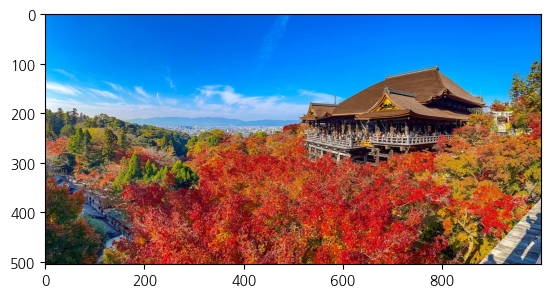

In [10]:
plt.imshow(img_arr)
plt.axis=('off')
plt.show

In [11]:
h, w, c =img_arr.shape
print(f"높이{h}, 넓이{w}, 채널{c}")

높이505, 넓이1000, 채널3


# 슬라이싱을 이용해서 이미지에서 일부분 잘라오기

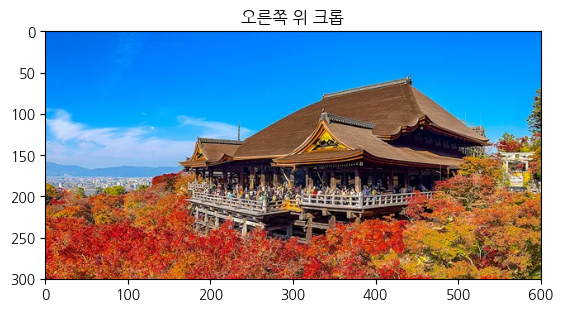

In [12]:
crop = img_arr[50:351, 350:951]
plt.imshow(crop)
plt.title("오른쪽 위 크롭")
plt.show()

# 이미지의 채널 별로 따로 출력하기

In [13]:
# RGB 채널 분리
R = img_arr[:,:,0]
G = img_arr[:,:,1]
B = img_arr[:,:,2]

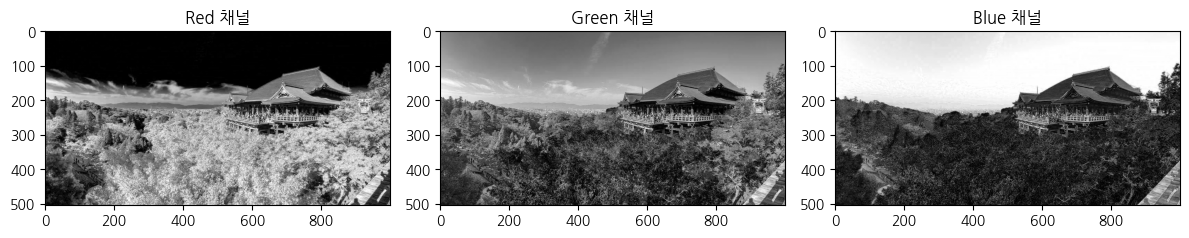

In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1); plt.imshow(R,cmap='gray'); plt.title("Red 채널")
plt.subplot(1, 3, 2); plt.imshow(G,cmap='gray'); plt.title("Green 채널")
plt.subplot(1, 3, 3); plt.imshow(B,cmap='gray');plt.title("Blue 채널")
plt.tight_layout()
plt.show()

# 브로드 캐스팅 연산으로 컬러를 흑백으로 바꾸기

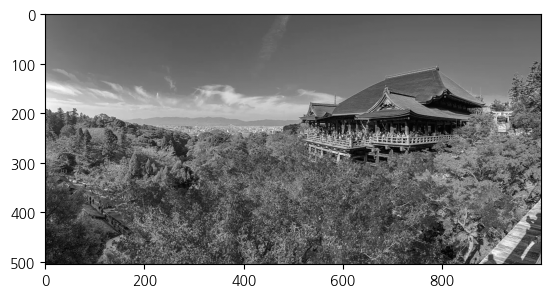

In [19]:
gray_arr = (R*0.299 + G*0.587 + B*0.114).astype(np.uint8)
plt.imshow(gray_arr, cmap='gray')
plt.show()

# 브로드 캐스팅 연산으로 이미지 밝기/대비 조절하기

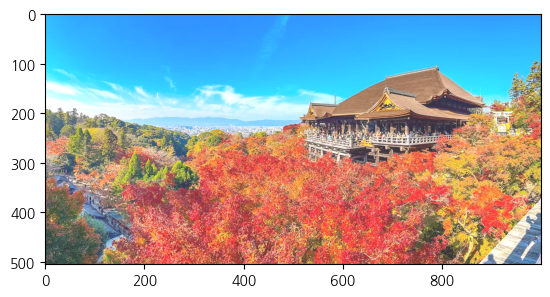

In [21]:
# 밝게 만들기 +50
brighter = img_arr.astype(np.int16) + 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.show()

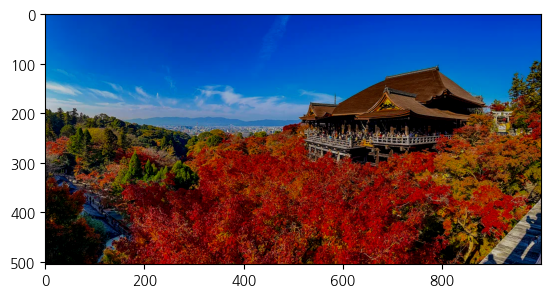

In [22]:
# 어붑게 만들기 +50
brighter = img_arr.astype(np.int16) - 50
brighter = np.clip(brighter, 0, 255).astype(np.uint8)
plt.imshow(brighter)
plt.show()

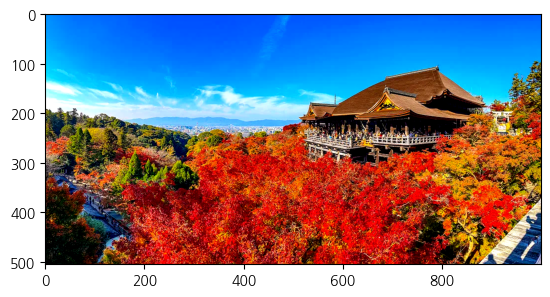

In [23]:
# 대비(contrast) 조절
alpha = 1.5 # 1보다 크면 대비 올림
contrast = (img_arr.astype(np.float32)-128)*alpha + 128
contrast = np.clip(contrast, 0, 255).astype(np.uint8)
plt.imshow(contrast)
plt.show()